In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

In [20]:
housePrices = pd.read_csv('train.csv', index_col='Id')

In [21]:
housePrices.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Exploration

In [9]:
housePrices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [165]:
corr = housePrices.select_dtypes(exclude=[object]).corr()

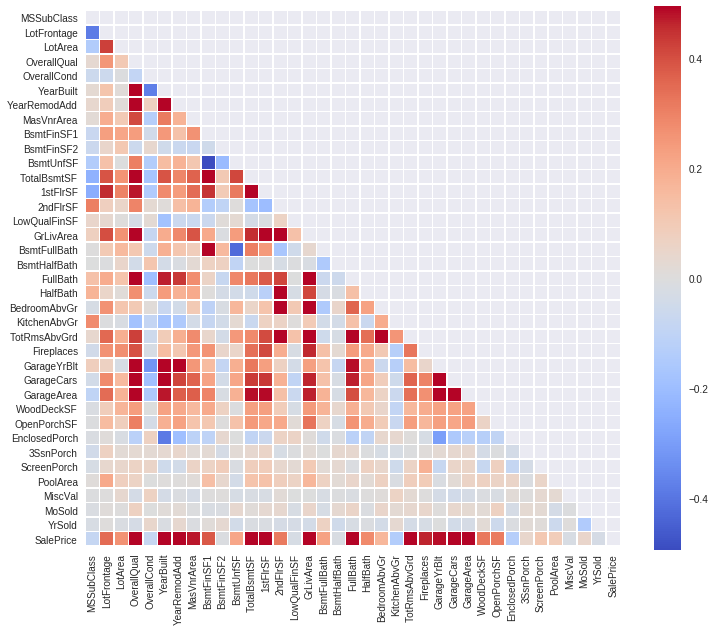

In [166]:
fig, ax = plt.subplots()
fig.set_size_inches(12,10)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
#ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
ax = sns.heatmap(corr, mask=mask, cmap='coolwarm', linewidths=0.5, vmax=.3, square=True)

In [167]:
corr.idxmax()

MSSubClass          MSSubClass
LotFrontage        LotFrontage
LotArea                LotArea
OverallQual        OverallQual
OverallCond        OverallCond
YearBuilt            YearBuilt
YearRemodAdd      YearRemodAdd
MasVnrArea          MasVnrArea
BsmtFinSF1          BsmtFinSF1
BsmtFinSF2          BsmtFinSF2
BsmtUnfSF            BsmtUnfSF
TotalBsmtSF        TotalBsmtSF
1stFlrSF              1stFlrSF
2ndFlrSF              2ndFlrSF
LowQualFinSF      LowQualFinSF
GrLivArea            GrLivArea
BsmtFullBath      BsmtFullBath
BsmtHalfBath      BsmtHalfBath
FullBath              FullBath
HalfBath              HalfBath
BedroomAbvGr      BedroomAbvGr
KitchenAbvGr      KitchenAbvGr
TotRmsAbvGrd      TotRmsAbvGrd
Fireplaces          Fireplaces
GarageYrBlt        GarageYrBlt
GarageCars          GarageCars
GarageArea          GarageArea
WoodDeckSF          WoodDeckSF
OpenPorchSF        OpenPorchSF
EnclosedPorch    EnclosedPorch
3SsnPorch            3SsnPorch
ScreenPorch        ScreenPorch
PoolArea

In [168]:
cond = np.triu(np.ones(corr.shape), k=1).astype(np.bool)

In [169]:
os = corr.where(cond).stack().sort_values(ascending=False)

In [170]:
# multilvl index
os[:,'SalePrice']

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
dtype: float64

In [171]:
os

GarageCars    GarageArea       0.882475
YearBuilt     GarageYrBlt      0.825667
GrLivArea     TotRmsAbvGrd     0.825489
TotalBsmtSF   1stFlrSF         0.819530
OverallQual   SalePrice        0.790982
GrLivArea     SalePrice        0.708624
2ndFlrSF      GrLivArea        0.687501
BedroomAbvGr  TotRmsAbvGrd     0.676620
BsmtFinSF1    BsmtFullBath     0.649212
YearRemodAdd  GarageYrBlt      0.642277
GarageCars    SalePrice        0.640409
GrLivArea     FullBath         0.630012
GarageArea    SalePrice        0.623431
2ndFlrSF      TotRmsAbvGrd     0.616423
TotalBsmtSF   SalePrice        0.613581
2ndFlrSF      HalfBath         0.609707
1stFlrSF      SalePrice        0.605852
OverallQual   GarageCars       0.600671
              GrLivArea        0.593007
YearBuilt     YearRemodAdd     0.592855
GarageYrBlt   GarageCars       0.588920
OverallQual   YearBuilt        0.572323
1stFlrSF      GrLivArea        0.566024
GarageYrBlt   GarageArea       0.564567
OverallQual   GarageArea       0.562022


In [172]:
type(os)

pandas.core.series.Series

In [173]:
os.iloc[0]

0.88247541428146026

In [174]:
os.loc['GarageCars', 'GarageArea']

0.88247541428146026

In [175]:
housePrices.filter(regex='Year').head()

,YearBuilt,YearRemodAdd
Id,,
1,2003,2003
2,1976,1976
3,2001,2002
4,1915,1970
5,2000,2000


In [176]:
os[:,'SalePrice'].iloc[0:4].index.tolist()

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

In [177]:
cols = os[:,'SalePrice'].iloc[0:4].index.tolist()

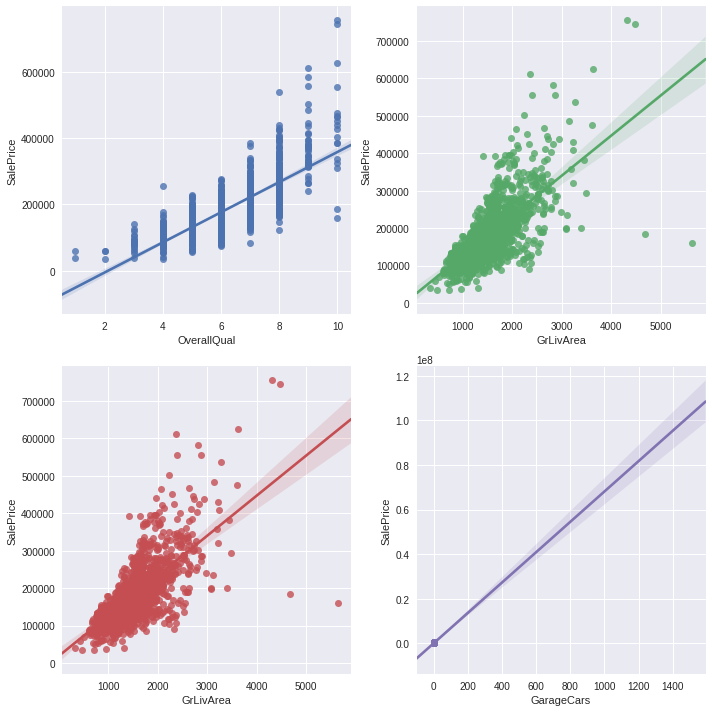

In [110]:
# show log(SalePrice)
from itertools import product

fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10,10)
for i,j in product(range(2), range(2)):
    sns.regplot(data=housePrices, y='SalePrice', x=cols[i+j], ax=ax[i,j])
    #sns.pairplot(data=housePrices, y='SalePrice', x=cols[i+j], ax=ax[i,j])
plt.tight_layout()

In [105]:
ax.shape

(2, 2)

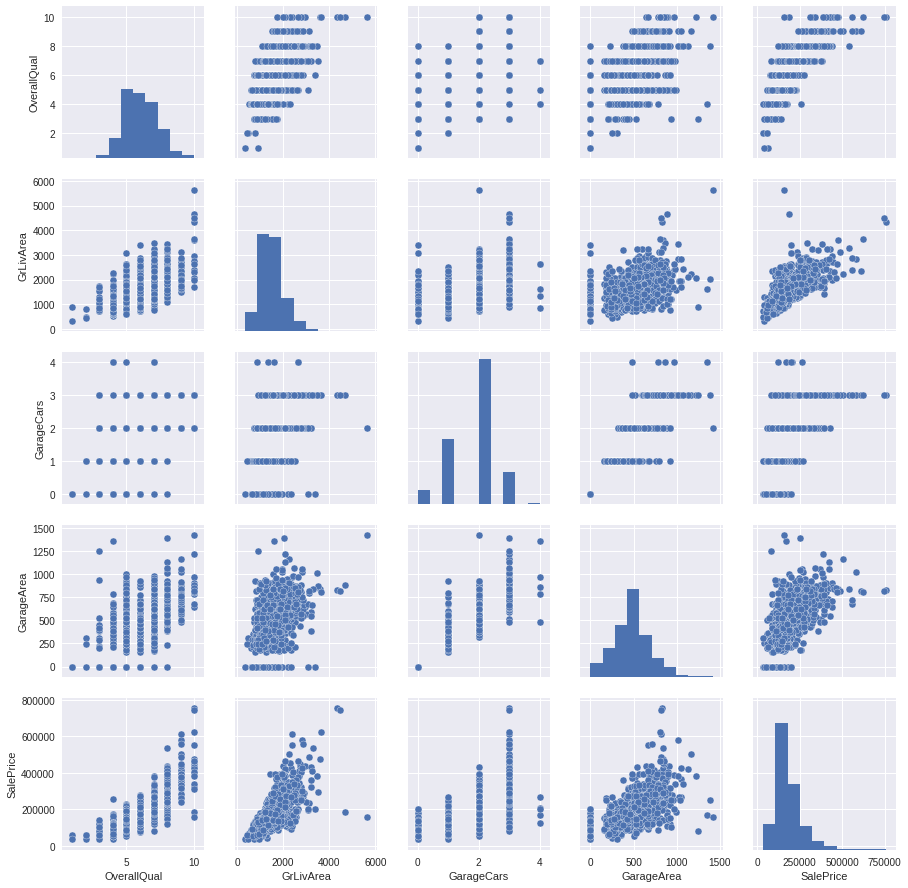

In [111]:
sns.pairplot(data=housePrices[cols + ['SalePrice']])

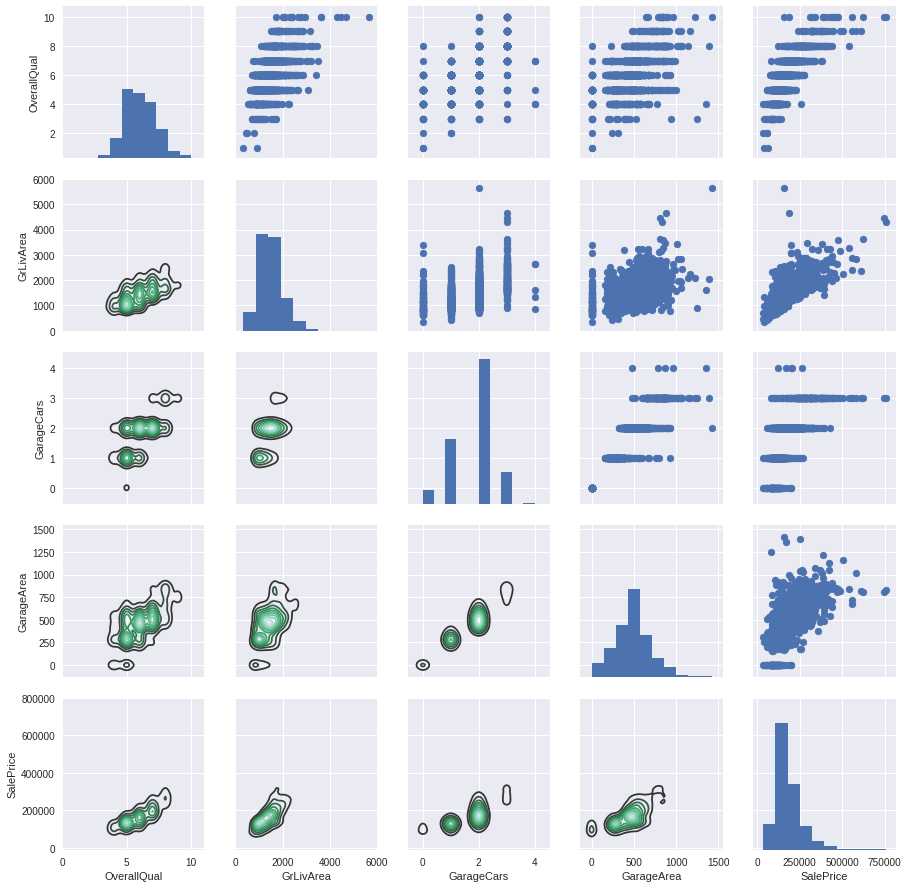

In [112]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(data=housePrices[cols + ['SalePrice']])
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

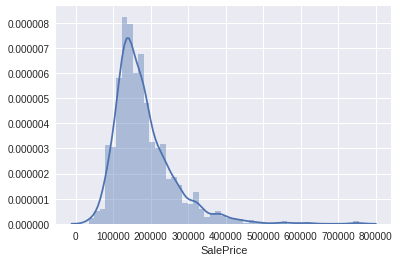

In [113]:
sns.distplot(housePrices.SalePrice)

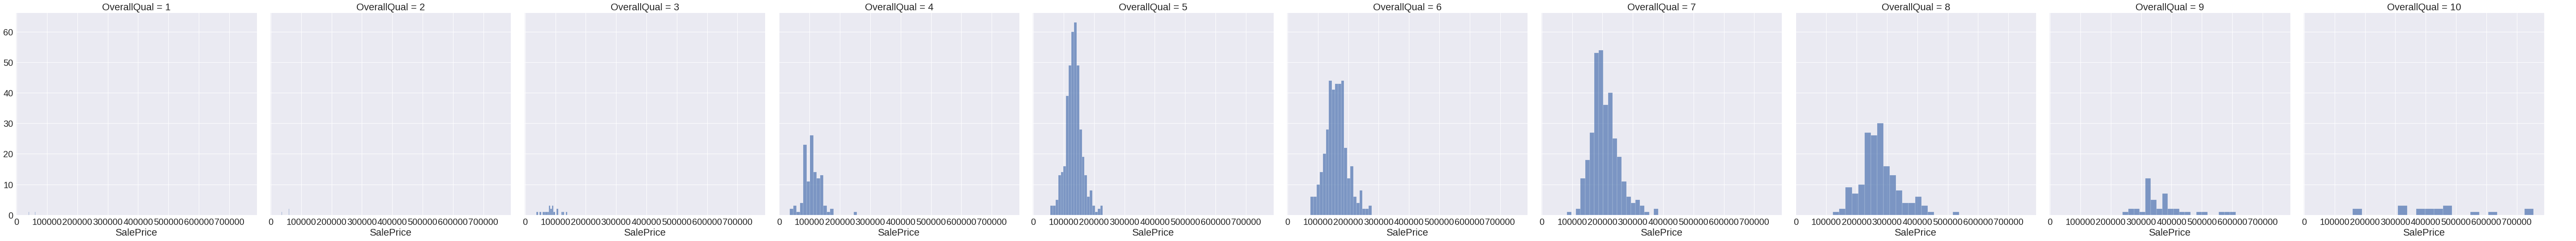

In [166]:
sns.set(font_scale=2)  # crazy big
g = sns.FacetGrid(housePrices,col="OverallQual", size=8, palette='seismic')
(g.map(plt.hist, "SalePrice",edgecolor="w", alpha=0.7, bins=20)).add_legend()

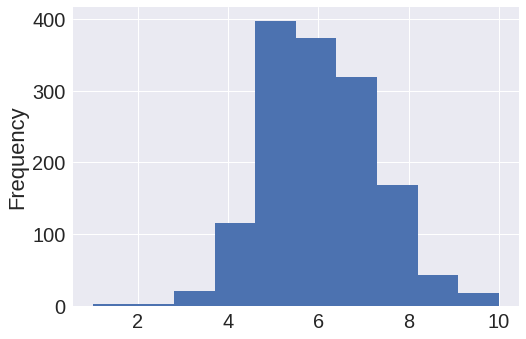

In [167]:
housePrices['OverallQual'].plot.hist()

In [176]:
## percentageOfNUlls
# axis = 0 -> column-wise
# axis = 1 -> row-wise
(housePrices.isnull().sum(axis=0) / len(housePrices) * 100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageType        5.547945
GarageCond        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageYrBlt       5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
RoofMatl          0.000000
Exterior1st       0.000000
RoofStyle         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
YearBuilt         0.000000
ExterCond         0.000000
Foundation        0.000000
YearRemodAdd      0.000000
SalePrice         0.000000
OverallCond       0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

In [177]:
(housePrices.select_dtypes(exclude=[object]).isnull().sum(axis=0) / len(housePrices) * 100).sort_values(ascending=False)

LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
SalePrice         0.000000
BsmtUnfSF         0.000000
GrLivArea         0.000000
LowQualFinSF      0.000000
2ndFlrSF          0.000000
1stFlrSF          0.000000
TotalBsmtSF       0.000000
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtHalfBath      0.000000
YearRemodAdd      0.000000
YearBuilt         0.000000
OverallCond       0.000000
OverallQual       0.000000
LotArea           0.000000
BsmtFullBath      0.000000
FullBath          0.000000
YrSold            0.000000
OpenPorchSF       0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
ScreenPorch       0.000000
3SsnPorch         0.000000
EnclosedPorch     0.000000
WoodDeckSF        0.000000
HalfBath          0.000000
GarageArea        0.000000
GarageCars        0.000000
Fireplaces        0.000000
TotRmsAbvGrd      0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
MSSubClass        0.000000
d

In [187]:
housePrices.filter(regex='Yr').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 2 columns):
GarageYrBlt    1379 non-null float64
YrSold         1460 non-null int64
dtypes: float64(1), int64(1)
memory usage: 74.2 KB


In [181]:
housePrices.filter(regex='Year').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 2 columns):
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
dtypes: int64(2)
memory usage: 74.2 KB


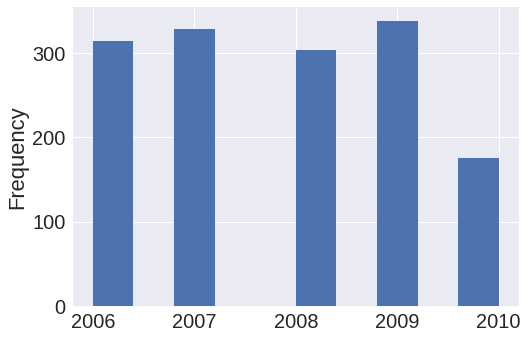

In [182]:
housePrices['YrSold'].plot.hist()

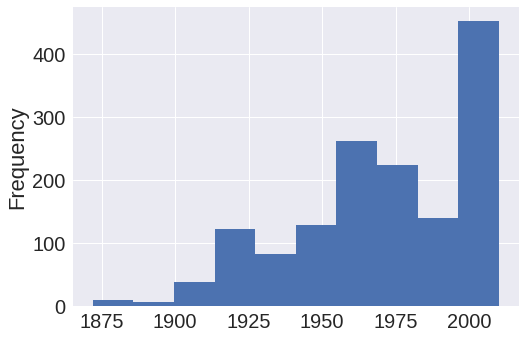

In [185]:
housePrices['YearBuilt'].plot.hist()

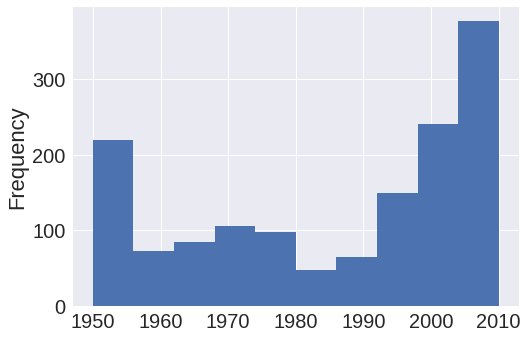

In [188]:
housePrices['YearRemodAdd'].plot.hist()

## Drawing Trees

In [3]:
from sklearn.tree import export_graphviz
import graphviz

In [4]:
from sklearn import tree

In [5]:
from sklearn import datasets

In [9]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [15]:
clf = tree.DecisionTreeClassifier(max_depth=4)

In [16]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

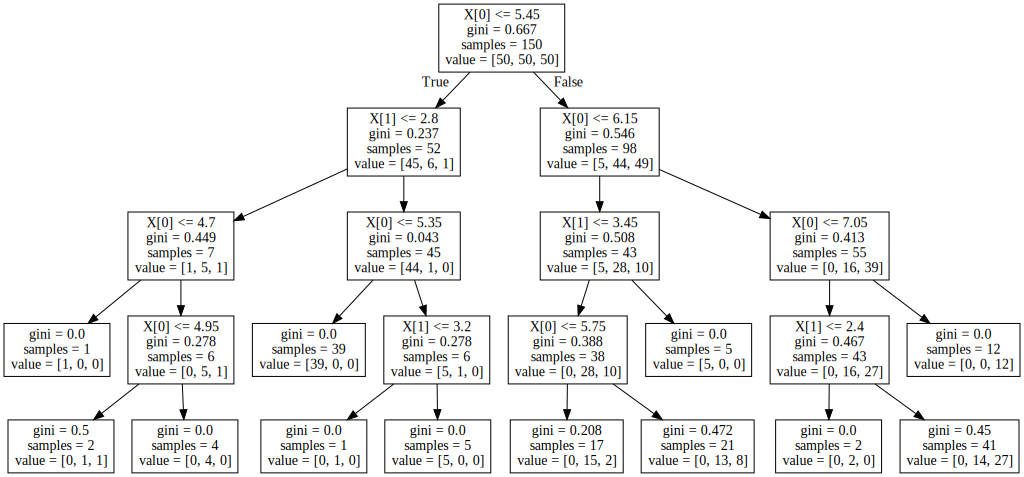

In [17]:
export_graphviz(clf, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [33]:
feat = housePrices[['OverallQual', 'YrSold', 'GrLivArea']]
target = housePrices.SalePrice

In [34]:
clf = tree.DecisionTreeRegressor(max_depth=3)

In [37]:
clf.fit(feat,np.log(target))

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

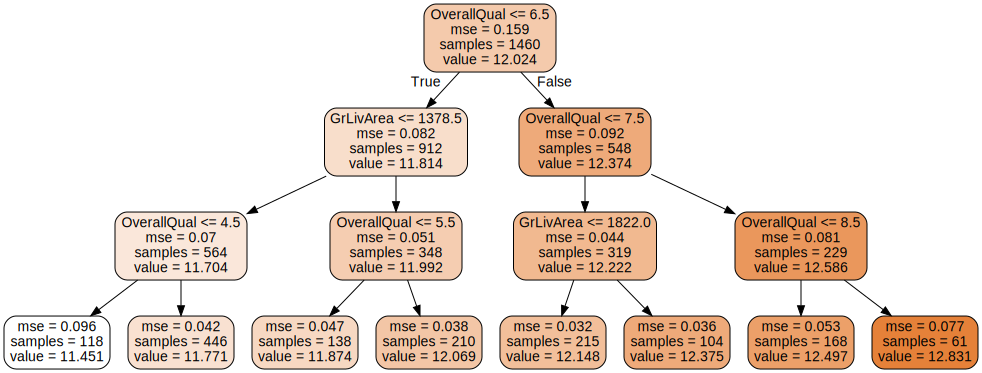

In [41]:
export_graphviz(clf, out_file="mytree.dot", feature_names=feat.columns.tolist(), filled=True, rounded=True)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

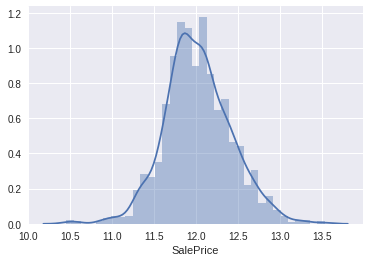

In [39]:
sns.distplot(np.log(housePrices.SalePrice))

In [42]:
import pandas_pipeline_classes as ppc

In [43]:
dropTooManyNulls = ppc.DropTooManyNulls(threshold=0.1)

In [45]:
dropTooManyNulls.fit_transform(housePrices).head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [46]:
dropTooManyNulls.cols

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

### ML Pipeline

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler

In [376]:
numerical_pipe = Pipeline([
    ('select_nums', ppc.DFTransform(lambda X: X.select_dtypes(exclude=[object]))),
    ('fill_nan', ppc.DFImputer(Imputer(strategy='median'))),
    ('MinMax', ppc.DFScaler(MinMaxScaler()))
])

In [377]:
categorical_pipe = Pipeline([
    ('select_cats', ppc.DFTransform(lambda X: X.select_dtypes(include=[object]))),
     ('fill_nan', ppc.DFTransform(lambda X: X.fillna('NA')) ),
    ('oneHot', ppc.DFDummyTransformer())
])

In [378]:
numerical_pipe.fit_transform(housePrices).head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.241078
2,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.203583
3,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.261908
4,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.145952
5,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.298709


In [379]:
categorical_pipe.fit_transform(housePrices).head()

,Alley=Grvl,Alley=NA,Alley=Pave,BldgType=1Fam,BldgType=2fmCon,BldgType=Duplex,BldgType=Twnhs,BldgType=TwnhsE,BsmtCond=Fa,BsmtCond=Gd,...,SaleType=ConLD,SaleType=ConLI,SaleType=ConLw,SaleType=New,SaleType=Oth,SaleType=WD,Street=Grvl,Street=Pave,Utilities=AllPub,Utilities=NoSeWa
Id,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [380]:
regressor_pipe = Pipeline([
    ('parallel_pipe', ppc.DFFeatureUnion([('nums', numerical_pipe), ('cats', categorical_pipe)])),
#        ('parallel_pipe', ppc.DFFeatureUnion([('cats', categorical_pipe)])),
#      ('parallel_pipe', ppc.DFFeatureUnion([('nums', numerical_pipe)])),
    ('regressor', RandomForestRegressor())
])

In [381]:
from sklearn.model_selection import train_test_split

In [382]:
features = housePrices.drop('SalePrice', axis=1)
target = np.log(housePrices['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4)

In [448]:
regressor_pipe.fit(X_train, y_train)

/home/jodahr/Programs/pandas_pipeline_classes/pandas_pipeline_classes/__init__.py:378: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-(n-k)/f))


Pipeline(memory=None,
     steps=[('parallel_pipe', DFFeatureUnion(transformer_list=[('nums', Pipeline(memory=None,
     steps=[('select_nums', DFTransform(copy=True, func=<function <lambda> at 0x7f6958a2bd08>)), ('fill_nan', DFImputer(copy=True,
     imputer=Imputer(axis=0, copy=True, missing_values='NaN', strategy='median',...tric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')],
         verbose=0))])

In [579]:
regressor_pipe.fit(features, target)

/home/jodahr/Programs/pandas_pipeline_classes/pandas_pipeline_classes/__init__.py:378: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-(n-k)/f))


Pipeline(memory=None,
     steps=[('parallel_pipe', DFFeatureUnion(transformer_list=[('nums', Pipeline(memory=None,
     steps=[('select_nums', DFTransform(copy=True, func=<function <lambda> at 0x7f6958a2bd08>)), ('fill_nan', DFImputer(copy=True,
     imputer=Imputer(axis=0, copy=True, missing_values='NaN', strategy='median',...ambda=0.8571, scale_pos_weight=1, seed=0, silent=1,
       subsample=0.5213)],
         verbose=0))])

In [580]:
regressor_pipe.score(X_test, y_test)

0.98886902472815064

In [581]:
test = pd.read_csv('test.csv', index_col='Id')

In [582]:
test_pred = np.exp(regressor_pipe.predict(test))

In [583]:
index = test.index.tolist()

In [584]:
final = pd.DataFrame()

In [585]:
final['Id'] = index

In [586]:
final['SalePrice'] = test_pred

In [587]:
final.to_csv('myTest_stacked.csv', index=False)

In [588]:
from sklearn.metrics import mean_squared_error, r2_score

In [589]:
mean_squared_error(y_test, regressor_pipe.predict(X_test))

0.0018775899951886852

In [590]:
r2_score(y_test, regressor_pipe.predict(X_test))

0.98886902472815064

In [362]:
predictedPrices = np.exp(regressor_pipe.predict(X_test))

In [363]:
result = X_test.copy()

In [364]:
result['true'] = np.exp(y_test)

In [365]:
result['pred'] = predictedPrices

In [366]:
result['ratio'] = result['true'] / result['pred'] - 1

In [367]:
result[['pred', 'true', 'ratio']][(np.abs(result.ratio) > 0.1)]

,pred,true,ratio
Id,,,
979,122776.175784,110000.0,-0.104061
474,345941.177502,440000.0,0.271893
1158,204133.559991,230000.0,0.126713
1031,112356.246908,160000.0,0.424042
1384,137839.375503,112000.0,-0.187460
1394,118983.812146,163000.0,0.369934
524,538135.008436,184750.0,-0.656685
1140,174171.038088,144000.0,-0.173226
80,126461.972370,110000.0,-0.130173


In [368]:
result[['pred', 'true', 'ratio']].describe()

,pred,true,ratio
count,584.000000,584.000000,584.000000
mean,177685.650341,178508.710616,0.014509
std,72822.683097,79241.696346,0.214875
min,72526.402811,39300.000000,-0.711274
25%,128289.745036,127875.000000,-0.107663
50%,156697.782126,158950.000000,-0.013037
75%,203204.648294,212250.000000,0.105813
max,554158.424666,755000.000000,1.090839


In [369]:
result.ratio.idxmax()

305

In [370]:
result[['pred', 'true', 'ratio']].loc[result.ratio.idxmax(),:]

pred     141091.655232
true     295000.000000
ratio         1.090839
Name: 305, dtype: float64

In [371]:
# get feature importance sorted
def get_featureImportance(features_list, importance_list):
    feats = {} # a dict to hold feature_name: feature_importance
    for feature, importance in zip(features_list, importance_list):
        feats[feature] = importance #add the name/value pair
    importancesDF = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'importance'})
    imp_list = importancesDF.index.tolist()
    imp_set = list(set([element.split('=')[0] for element in imp_list]))
    impDict = {}
    for element in imp_set:
        impDict[element] = importancesDF.filter(regex=element, axis=0).sum()
    return pd.DataFrame.from_dict(impDict, orient='index').sort_values(by='importance',axis=0, ascending=False)

In [372]:
forest = regressor_pipe.steps[-1][1]
importance_list = forest.feature_importances_.tolist()
features_list = Pipeline(regressor_pipe.steps[:-1]).transform(X_train).columns.tolist()

In [373]:
importanceDF = get_featureImportance(features_list, importance_list)

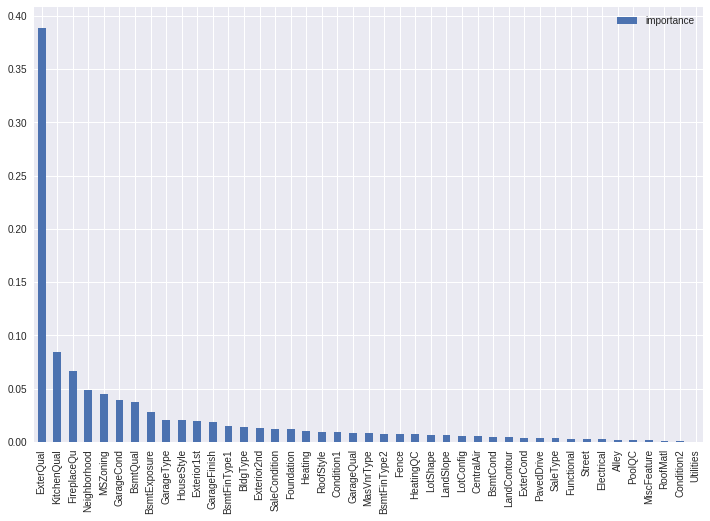

In [374]:
importanceDF
importanceDF.plot.bar(figsize=(12,8))

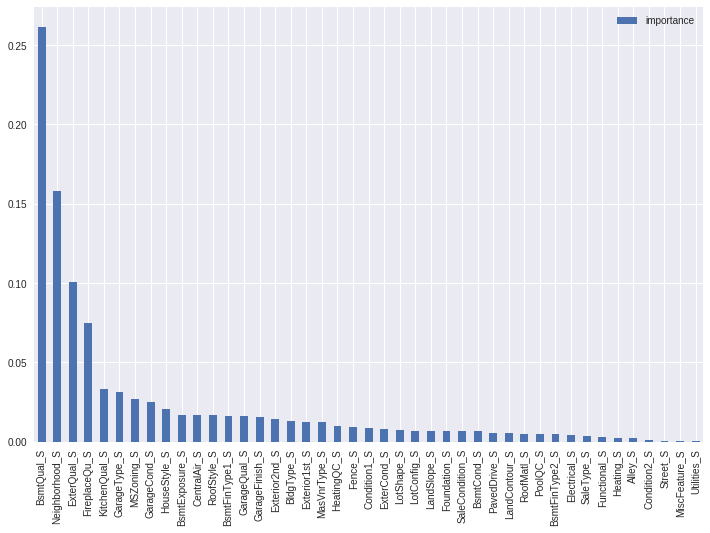

In [350]:
importanceDF
importanceDF.plot.bar(figsize=(12,8))

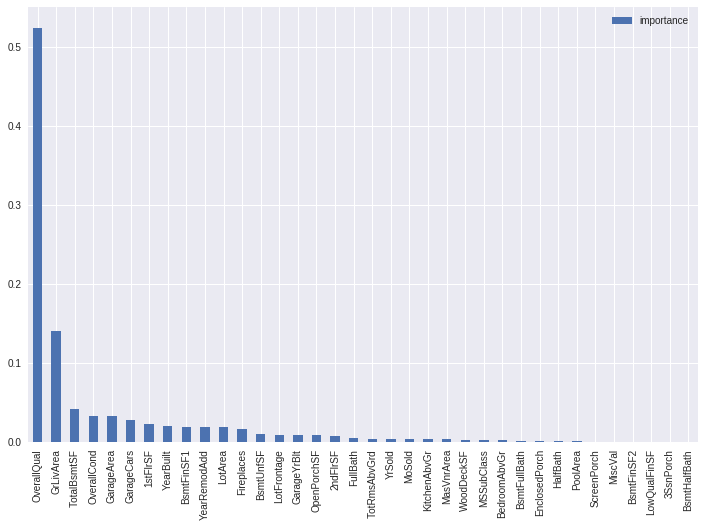

In [329]:
importanceDF
importanceDF.plot.bar(figsize=(12,8))

In [181]:
importanceDF.head(10)

,importance
OverallQual,0.537214
GrLivArea,0.091423
GarageArea,0.047092
TotalBsmtSF,0.046498
1stFlrSF,0.036954
GarageCars,0.024689
LotArea,0.016255
BsmtFinSF1,0.013996
CentralAir,0.012728
YearRemodAdd,0.012464


In [180]:
# multilvl index
os[:,'SalePrice'].head(10)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
dtype: float64

In [182]:
from sklearn.linear_model import LinearRegression

In [273]:
categorical_pipe = Pipeline([
    ('select_cats', ppc.DFTransform(lambda X: X.select_dtypes(include=[object]))),
    ('Scale', ppc.HighCardinality(f=0.5) ),
    ('MinMAx', ppc.DFScaler(MinMaxScaler()))
#     ('fill_nan', ppc.DFTransform(lambda X: X.fillna('NA')) ),
#    ('oneHot', ppc.DFDummyTransformer())
])

In [274]:
regressor_pipe = Pipeline([
    ('parallel_pipe', ppc.DFFeatureUnion([('nums', numerical_pipe), ('cats', categorical_pipe)])),
    ('regressor', LinearRegression())
])

In [275]:
regressor_pipe.fit(X_train, y_train)

/home/jodahr/Programs/pandas_pipeline_classes/pandas_pipeline_classes/__init__.py:378: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-(n-k)/f))


Pipeline(memory=None,
     steps=[('parallel_pipe', DFFeatureUnion(transformer_list=[('nums', Pipeline(memory=None,
     steps=[('select_nums', DFTransform(copy=True, func=<function <lambda> at 0x7f695736aa60>)), ('fill_nan', DFImputer(copy=True,
     imputer=Imputer(axis=0, copy=True, missing_values='NaN', strategy='median',...]))])), ('regressor', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [276]:
regressor_pipe.score(X_test, y_test)

0.86326840991212461

In [277]:
lr = regressor_pipe.steps[-1]

In [278]:
lr[-1].coef_

array([ -1.03357441e-01,  -1.95983303e-01,   4.21655677e-01,
         6.02851326e-01,   3.19188362e-01,   9.73701022e-02,
         3.91832634e-02,   6.82184746e-02,  -1.37110880e+11,
        -2.62366674e+10,  -5.23032824e+10,   1.48431517e+11,
         1.99139765e+12,   8.55414502e+11,   2.41270757e+11,
        -2.42550223e+12,   1.06132507e-01,   4.22420502e-02,
         7.75909424e-02,   4.51917648e-02,   1.69075012e-01,
         6.61735535e-02,   9.39483643e-02,   7.08346367e-02,
        -2.59370804e-02,   1.78375244e-01,   1.12154007e-01,
         9.40968990e-02,  -6.70518875e-02,   4.71445322e-02,
         1.42888784e-01,   1.38736844e-01,  -7.43553162e-01,
        -1.49264455e-01,   2.01931000e-02,  -2.51197815e-02,
         8.73203278e-02,   2.08013535e-01,  -4.12254333e-02,
         1.61819458e-02,   9.28516388e-02,   5.05129716e+08,
         3.06789875e-02,   4.30569649e-02,   1.24275208e-01,
         1.14315033e-01,  -2.80380249e-02,   2.34146118e-02,
        -3.65138277e-02,

In [279]:
lr = regressor_pipe.steps[-1][1]
importance_list = lr.coef_
features_list = Pipeline(regressor_pipe.steps[:-1]).transform(X_train).columns.tolist()

In [280]:
Pipeline(regressor_pipe.steps[:-1]).transform(X_train).describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_S,GarageFinish_S,GarageQual_S,GarageCond_S,PavedDrive_S,PoolQC_S,Fence_S,MiscFeature_S,SaleType_S,SaleCondition_S
count,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,...,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000
mean,0.207998,0.167472,0.043369,0.566971,0.511579,0.717653,0.570148,0.076520,0.080265,0.036785,...,0.425805,0.443249,0.925694,0.927436,0.931954,0.002479,0.870169,0.873386,0.400534,0.322382
std,0.238554,0.071364,0.048990,0.152058,0.153729,0.223538,0.346904,0.133292,0.083321,0.130751,...,0.280778,0.415035,0.242374,0.245445,0.246771,0.047920,0.312450,0.078169,0.185071,0.213503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.133562,0.029839,0.444444,0.428571,0.583942,0.266667,0.000000,0.000000,0.000000,...,0.056128,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.887444,0.360586,0.282476
50%,0.176471,0.167808,0.038335,0.555556,0.428571,0.729927,0.716667,0.000000,0.069277,0.000000,...,0.571501,0.533407,1.000000,1.000000,1.000000,0.000000,1.000000,0.887444,0.360586,0.282476
75%,0.294118,0.202055,0.047829,0.666667,0.571429,0.934307,0.900000,0.119194,0.128455,0.000000,...,0.571501,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.887444,0.360586,0.282476
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [281]:
importanceDF = get_featureImportance(features_list, np.abs(importance_list))

In [282]:
importanceDF.head()

,importance
GrLivArea,2.425502e+12
1stFlrSF,1.991398e+12
2ndFlrSF,8.554145e+11
LowQualFinSF,2.412708e+11
TotalBsmtSF,1.484315e+11


In [237]:
# multilvl index
os[:,'SalePrice'].head(10)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
dtype: float64

DFFeatureUnion(transformer_list=[('nums', Pipeline(memory=None,
     steps=[('select_nums', DFTransform(copy=True, func=<function <lambda> at 0x7f695736aa60>)), ('fill_nan', DFImputer(copy=True,
     imputer=Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0))), ('MinMax', DFScaler(copy=...f=0.001)), ('MinMAx', DFScaler(copy=True, scaler=MinMaxScaler(copy=True, feature_range=(0, 1))))]))])

In [269]:
categorical_pipe = Pipeline([
    ('select_cats', ppc.DFTransform(lambda X: X.select_dtypes(include=[object]))),
    ('Scale', ppc.HighCardinality(f=0.5) ),
    ('MinMAx', ppc.DFScaler(MinMaxScaler()))
#     ('fill_nan', ppc.DFTransform(lambda X: X.fillna('NA')) ),
#    ('oneHot', ppc.DFDummyTransformer())
])

In [270]:
categorical_pipe.fit(X_train, y_train)

/home/jodahr/Programs/pandas_pipeline_classes/pandas_pipeline_classes/__init__.py:378: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-(n-k)/f))


Pipeline(memory=None,
     steps=[('select_cats', DFTransform(copy=True, func=<function <lambda> at 0x7f6956040b70>)), ('Scale', HighCardinality(assumption='median',
        cols=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgT...rue, f=0.5)), ('MinMAx', DFScaler(copy=True, scaler=MinMaxScaler(copy=True, feature_range=(0, 1))))])

In [271]:
hc = categorical_pipe.steps[1][1]

In [272]:
from IPython.display import display, HTML
for key in hc.lookup_table:
    display(hc.lookup_table[key])

,MSZoning_count,MSZoning_posterior,MSZoning_weight,MSZoning_S
C (all),7,11.133128,1.603811e-28,11.998122
FV,39,12.242887,5.000000e-01,12.120504
RH,11,11.798104,4.780893e-25,11.998122
RL,676,12.066811,1.000000e+00,12.066811
RM,143,11.699405,1.000000e+00,11.699405
NaN,0,0.000000,1.333615e-34,11.998122


,Street_count,Street_posterior,Street_weight,Street_S
Grvl,4,11.492436,0.0,11.998122
Pave,872,12.000892,1.0,12.000892
NaN,0,0.000000,0.0,11.998122


,Alley_posterior,Alley_count,Alley_weight,Alley_S
Alley,,,,
Grvl,11.745923,30,5.000000e-01,11.872022
NaN,12.013701,823,1.000000e+00,12.013701
Pave,12.058153,23,8.315280e-07,11.998122


,LotShape_count,LotShape_posterior,LotShape_weight,LotShape_S
IR1,300,12.166551,1.000000e+00,12.166551
IR2,18,12.287387,3.380307e-123,11.998122
IR3,8,12.222186,6.967331e-132,11.998122
Reg,550,11.884489,1.000000e+00,11.884489
NaN,0,0.000000,7.840699e-139,11.998122


,LandContour_count,LandContour_posterior,LandContour_weight,LandContour_S
Bnk,42,11.849398,9.990889e-01,11.849533
HLS,35,12.341259,9.110512e-04,11.998434
Low,21,12.141534,6.305117e-16,11.998122
Lvl,778,11.995352,1.000000e+00,11.995352
NaN,0,0.000000,3.625141e-34,11.998122


,Utilities_count,Utilities_posterior,Utilities_weight,Utilities_S
AllPub,876,11.998122,0.5,11.998122
NaN,0,0.000000,0.0,11.998122


,LotConfig_count,LotConfig_posterior,LotConfig_weight,LotConfig_S
Corner,159,11.976659,1.000000e+00,11.976659
CulDSac,57,12.242887,5.000000e-01,12.120504
FR2,32,12.038817,1.928750e-22,11.998122
FR3,4,12.181311,9.221146e-47,11.998122
Inside,624,11.982445,1.000000e+00,11.982445
NaN,0,0.000000,3.093350e-50,11.998122


,LandSlope_count,LandSlope_posterior,LandSlope_weight,LandSlope_S
Gtl,832,11.993034,1.000000e+00,11.993034
Mod,38,12.043485,5.000000e-01,12.020803
Sev,6,12.220986,1.603811e-28,11.998122
NaN,0,0.000000,9.854155e-34,11.998122


,Neighborhood_count,Neighborhood_posterior,Neighborhood_weight,Neighborhood_S
Blmngtn,8,12.067912,7.781132e-20,11.998122
Blueste,1,11.728037,6.470235e-26,11.998122
BrDale,9,11.626254,5.749522e-19,11.998122
BrkSide,33,11.703546,9.975274e-01,11.704274
ClearCr,14,12.148157,1.266417e-14,11.998122
CollgCr,93,12.195517,1.000000e+00,12.195517
Crawfor,30,12.184608,5.000000e-01,12.091365
Edwards,59,11.744037,1.000000e+00,11.744037
Gilbert,39,12.118334,1.000000e+00,12.118334
IDOTRR,28,11.541396,1.798621e-02,11.989907


,Condition1_count,Condition1_posterior,Condition1_weight,Condition1_S
Artery,32,11.694830,1.000000e+00,11.694830
Feedr,57,11.831379,1.000000e+00,11.831379
Norm,744,12.017028,1.000000e+00,12.017028
PosA,3,12.154779,6.144175e-06,11.998123
PosN,9,12.132157,5.000000e-01,12.065139
RRAe,8,11.871986,1.192029e-01,11.983086
RRAn,19,12.095141,1.000000e+00,12.095141
RRNe,1,12.138864,1.125352e-07,11.998122
RRNn,3,12.273731,6.144175e-06,11.998123
NaN,0,0.000000,1.522998e-08,11.998122


,Condition2_count,Condition2_posterior,Condition2_weight,Condition2_S
Feedr,4,11.804592,0.997527,11.805070
Norm,868,12.000892,1.000000,12.000892
PosN,1,12.126759,0.500000,12.062440
RRAe,1,12.154779,0.500000,12.076451
RRAn,1,11.827043,0.500000,11.912582
RRNn,1,11.736069,0.500000,11.867095
NaN,0,0.000000,0.119203,10.567911


,BldgType_count,BldgType_posterior,BldgType_weight,BldgType_S
1Fam,751,12.016726,1.000000e+00,12.016726
2fmCon,17,11.736069,1.522998e-08,11.998122
Duplex,26,11.813030,5.000000e-01,11.905576
Twnhs,20,11.922807,6.144175e-06,11.998121
TwnhsE,62,12.055974,1.000000e+00,12.055974
NaN,0,0.000000,2.610279e-23,11.998122


,HouseStyle_count,HouseStyle_posterior,HouseStyle_weight,HouseStyle_S
1.5Fin,102,11.803459,1.000000e+00,11.803459
1.5Unf,5,11.635143,9.602680e-24,11.998122
1Story,427,11.957611,1.000000e+00,11.957611
2.5Fin,6,12.128980,7.095474e-23,11.998122
2.5Unf,7,11.759786,5.242886e-22,11.998122
2Story,266,12.157404,1.000000e+00,12.157404
SFoyer,26,11.810804,1.670142e-05,11.998119
SLvl,37,12.016726,9.999833e-01,12.016726
NaN,0,0.000000,4.359610e-28,11.998122


,RoofStyle_count,RoofStyle_posterior,RoofStyle_weight,RoofStyle_S
Flat,4,12.234026,0.017986,12.002365
Gable,700,11.983554,1.000000,11.983554
Gambrel,7,11.842229,0.880797,11.860812
Hip,159,12.025749,1.000000,12.025749
Mansard,5,12.072541,0.119203,12.006993
Shed,1,12.154779,0.000045,11.998129
NaN,0,0.000000,0.000006,11.998048


,RoofMatl_count,RoofMatl_posterior,RoofMatl_weight,RoofMatl_S
ClyTile,1,11.982929,0.268941,11.994036
CompShg,863,11.992260,1.000000,11.992260
Membran,1,12.394625,0.268941,12.104758
Metal,1,12.100712,0.268941,12.025713
Roll,1,11.827736,0.268941,11.952298
Tar&Grv,2,11.664088,0.731059,11.753923
WdShake,3,12.337101,0.952574,12.321025
WdShngl,4,12.701772,0.993307,12.697062
NaN,0,0.000000,0.047426,11.429100


,Exterior1st_count,Exterior1st_posterior,Exterior1st_weight,Exterior1st_S
AsbShng,12,11.689836,3.353501e-04,11.998018
AsphShn,1,11.512925,9.357623e-14,11.998122
BrkComm,2,11.158287,6.914400e-13,11.998122
BrkFace,31,12.132157,1.000000e+00,12.132157
CBlock,1,11.561716,9.357623e-14,11.998122
CemntBd,38,12.333661,1.000000e+00,12.333661
HdBoard,140,11.928335,1.000000e+00,11.928335
ImStucc,1,12.476100,9.357623e-14,11.998122
MetalSd,138,11.840427,1.000000e+00,11.840427
Plywood,58,12.078223,1.000000e+00,12.078223


,Exterior2nd_count,Exterior2nd_posterior,Exterior2nd_weight,Exterior2nd_S
AsbShng,13,11.715866,3.353501e-04,11.998027
AsphShn,3,11.842229,6.914400e-13,11.998122
Brk Cmn,2,11.158287,9.357623e-14,11.998122
BrkFace,19,11.982929,9.820138e-01,11.983202
CBlock,1,11.561716,1.266417e-14,11.998122
CmentBd,37,12.323856,1.000000e+00,12.323856
HdBoard,126,11.970034,1.000000e+00,11.970034
ImStucc,7,12.185870,2.061154e-09,11.998122
MetalSd,135,11.831379,1.000000e+00,11.831379
Other,1,12.672946,1.266417e-14,11.998122


,MasVnrType_posterior,MasVnrType_count,MasVnrType_weight,MasVnrType_S
MasVnrType,,,,
BrkCmn,11.849589,8,3.917470e-64,11.998122
BrkFace,12.100156,275,1.000000e+00,12.100156
NaN,12.247267,6,7.175096e-66,11.998122
None,11.849398,506,1.000000e+00,11.849398
Stone,12.388394,81,5.000000e-01,12.193258


,ExterQual_count,ExterQual_posterior,ExterQual_weight,ExterQual_S
Ex,27,12.799176,2.219508e-115,11.998122
Fa,9,11.314475,5.148200e-131,11.998122
Gd,291,12.317167,1.000000e+00,12.317167
TA,549,11.848683,1.000000e+00,11.848683
NaN,0,0.000000,7.840699e-139,11.998122


,ExterCond_count,ExterCond_posterior,ExterCond_weight,ExterCond_S
Ex,1,11.989160,2.319523e-16,11.998122
Fa,19,11.682668,5.000000e-01,11.840395
Gd,81,11.931636,1.000000e+00,11.931636
Po,1,11.245046,2.319523e-16,11.998122
TA,774,12.013701,1.000000e+00,12.013701
NaN,0,0.000000,3.139133e-17,11.998122


,Foundation_count,Foundation_posterior,Foundation_weight,Foundation_S
BrkTil,91,11.759786,1.000000e+00,11.759786
CBlock,386,11.860049,1.000000e+00,11.860049
PConc,381,12.246735,1.000000e+00,12.246735
Slab,12,11.466539,4.906095e-35,11.998122
Stone,4,11.744541,5.521082e-42,11.998122
Wood,2,11.939111,1.011221e-43,11.998122
NaN,0,0.000000,1.852117e-45,11.998122


,BsmtQual_posterior,BsmtQual_count,BsmtQual_weight,BsmtQual_S
BsmtQual,,,,
Ex,12.669998,67,5.000000e-01,12.334060
Fa,11.596276,20,1.500786e-41,11.998122
Gd,12.187144,370,1.000000e+00,12.187144
NaN,11.502824,22,8.194013e-40,11.998122
TA,11.813030,397,1.000000e+00,11.813030


,BsmtCond_posterior,BsmtCond_count,BsmtCond_weight,BsmtCond_S
BsmtCond,,,,
Fa,11.635143,27,5.000000e-01,11.816632
Gd,12.237087,35,9.999999e-01,12.237087
NaN,11.502824,22,4.539787e-05,11.998099
Po,11.112448,1,2.610279e-23,11.998122
TA,12.010666,791,1.000000e+00,12.010666


,BsmtExposure_posterior,BsmtExposure_count,BsmtExposure_weight,BsmtExposure_S
BsmtExposure,,,,
Av,12.134823,136,1.000000e+00,12.134823
Gd,12.389422,76,5.000000e-01,12.193772
Mn,12.072541,69,8.315280e-07,11.998122
NaN,11.512925,23,9.221146e-47,11.998122
No,11.951180,572,1.000000e+00,11.951180


,BsmtFinType1_posterior,BsmtFinType1_count,BsmtFinType1_weight,BsmtFinType1_S
BsmtFinType1,,,,
ALQ,11.959211,138,1.000000e+00,11.959211
BLQ,11.849398,82,1.192029e-01,11.980393
GLQ,12.277928,251,1.000000e+00,12.277928
LwQ,11.816393,40,4.473779e-38,11.998122
NaN,11.502824,22,1.037703e-53,11.998122
Rec,11.881035,83,5.000000e-01,11.939578
Unf,11.950858,260,1.000000e+00,11.950858


,BsmtFinType2_posterior,BsmtFinType2_count,BsmtFinType2_weight,BsmtFinType2_S
BsmtFinType2,,,,
ALQ,12.041318,10,5.109089e-12,11.998122
BLQ,11.878508,16,8.315280e-07,11.998122
GLQ,12.253773,8,9.357623e-14,11.998122
LwQ,11.941323,26,9.975274e-01,11.941464
NaN,11.512925,23,5.000000e-01,11.755524
Rec,11.952760,32,1.000000e+00,11.952760
Unf,12.013701,761,1.000000e+00,12.013701


,Heating_count,Heating_posterior,Heating_weight,Heating_S
Floor,1,11.191342,0.047426,11.959859
GasA,860,12.007286,1.000000,12.007286
GasW,9,11.820410,0.999998,11.820411
Grav,3,11.277203,0.731059,11.471088
OthW,2,11.741606,0.268941,11.929134
Wall,1,11.492723,0.047426,11.974153
NaN,0,0.000000,0.006693,11.917820


,HeatingQC_count,HeatingQC_posterior,HeatingQC_weight,HeatingQC_S
Ex,438,12.194505,1.000000e+00,12.194505
Fa,29,11.755872,3.652892e-153,11.998122
Gd,146,11.918713,1.540088e-51,11.998122
TA,263,11.812289,1.000000e+00,11.812289
NaN,0,0.000000,2.363507e-178,11.998122


,CentralAir_count,CentralAir_posterior,CentralAir_weight,CentralAir_S
N,58,11.559743,0.0,11.998122
Y,818,12.025749,1.0,12.025749
NaN,0,0.000000,0.0,11.998122


,Electrical_count,Electrical_posterior,Electrical_weight,Electrical_S
FuseA,55,11.686879,1.000000e+00,11.686879
FuseF,19,11.711776,5.000000e-01,11.854949
FuseP,3,11.314475,1.266417e-14,11.998122
Mix,1,11.112448,2.319523e-16,11.998122
SBrkr,798,12.037654,1.000000e+00,12.037654
NaN,0,0.000000,3.139133e-17,11.998122


,KitchenQual_count,KitchenQual_posterior,KitchenQual_weight,KitchenQual_S
Ex,57,12.661914,1.034044e-129,11.998122
Fa,25,11.522876,1.658410e-157,11.998122
Gd,354,12.211060,1.000000e+00,12.211060
TA,440,11.821325,1.000000e+00,11.821325
NaN,0,0.000000,3.198659e-179,11.998122


,Functional_count,Functional_posterior,Functional_weight,Functional_S
Maj1,5,11.951180,3.059022e-07,11.998122
Maj2,3,11.608236,5.602796e-09,11.998122
Min1,15,11.877569,9.933071e-01,11.878375
Min2,24,11.863136,1.000000e+00,11.863136
Mod,10,11.982929,6.692851e-03,11.998020
Typ,819,12.013701,1.000000e+00,12.013701
NaN,0,0.000000,1.388794e-11,11.998122


,FireplaceQu_posterior,FireplaceQu_count,FireplaceQu_weight,FireplaceQu_S
FireplaceQu,,,,
Ex,12.661914,13,2.001470e-75,11.998122
Fa,11.967176,18,4.408531e-71,11.998122
Gd,12.188414,252,1.000000e+00,12.188414
NaN,11.810433,406,1.000000e+00,11.810433
Po,11.763684,7,1.229746e-80,11.998122
TA,12.133487,180,1.000000e+00,12.133487


,GarageType_posterior,GarageType_count,GarageType_weight,GarageType_S
GarageType,,,,
2Types,11.918391,3,6.054602e-39,11.998122
Attchd,12.122691,524,1.000000e+00,12.122691
Basment,12.013701,11,5.380186e-32,11.998122
BuiltIn,12.421184,53,9.999939e-01,12.421181
CarPort,11.530765,5,3.305701e-37,11.998122
Detchd,11.763684,233,1.000000e+00,11.763684
NaN,11.451050,47,5.000000e-01,11.724586


,GarageFinish_posterior,GarageFinish_count,GarageFinish_weight,GarageFinish_S
GarageFinish,,,,
Fin,12.278393,216,1.266417e-14,11.998122
NaN,11.451050,47,2.046641e-161,11.998122
RFn,12.160029,248,1.000000e+00,12.160029
Unf,11.813030,365,1.000000e+00,11.813030


,GarageQual_posterior,GarageQual_count,GarageQual_weight,GarageQual_S
GarageQual,,,,
Ex,11.727638,2,6.305117e-16,11.998122
Fa,11.728037,33,1.000000e+00,11.728037
Gd,12.230246,6,1.879529e-12,11.998122
NaN,11.451050,47,1.000000e+00,11.451050
Po,11.470092,2,6.305117e-16,11.998122
TA,12.037654,786,1.000000e+00,12.037654


,GarageCond_posterior,GarageCond_count,GarageCond_weight,GarageCond_S
GarageCond,,,,
Ex,11.727638,2,1.879529e-12,11.998122
Fa,11.648365,23,9.999997e-01,11.648365
Gd,11.894728,8,3.059022e-07,11.998122
NaN,11.451050,47,1.000000e+00,11.451050
Po,11.646716,6,5.602796e-09,11.998122
TA,12.043524,790,1.000000e+00,12.043524


,PavedDrive_count,PavedDrive_posterior,PavedDrive_weight,PavedDrive_S
N,57,11.589887,5.000000e-01,11.794004
P,20,11.757737,7.281290e-33,11.998122
Y,799,12.028739,1.000000e+00,12.028739
NaN,0,0.000000,3.093350e-50,11.998122


,PoolQC_posterior,PoolQC_count,PoolQC_weight,PoolQC_S
PoolQC,,,,
Fa,12.267734,2,0.5,12.132928
Gd,12.016174,2,0.5,12.007148
NaN,11.995352,872,1.0,11.995352


,Fence_posterior,Fence_count,Fence_weight,Fence_S
Fence,,,,
GdPrv,12.021220,36,5.000000e-01,12.009671
GdWo,11.859820,32,3.353501e-04,11.998075
MnPrv,11.831379,96,1.000000e+00,11.831379
MnWw,11.774149,8,4.780893e-25,11.998122
NaN,12.055974,704,1.000000e+00,12.055974


,MiscFeature_posterior,MiscFeature_count,MiscFeature_weight,MiscFeature_S
MiscFeature,,,,
Gar2,12.154779,1,0.119203,12.016796
NaN,12.007622,843,1.000000,12.007622
Othr,11.356596,2,0.500000,11.677359
Shed,11.870600,29,1.000000,11.870600
TenC,12.429216,1,0.119203,12.049509


,SaleType_count,SaleType_posterior,SaleType_weight,SaleType_S
COD,23,11.755872,1.000000,11.755872
CWD,3,11.970350,0.500000,11.984236
Con,2,12.483911,0.119203,12.056029
ConLD,4,11.859499,0.880797,11.876023
ConLI,2,11.694378,0.119203,11.961915
ConLw,3,11.877569,0.500000,11.937845
New,69,12.384219,1.000000,12.384219
Oth,2,11.553747,0.119203,11.945151
WD,768,11.982445,1.000000,11.982445
NaN,0,0.000000,0.002473,11.968455


,SaleCondition_count,SaleCondition_posterior,SaleCondition_weight,SaleCondition_S
Abnorml,59,11.831379,1.000000e+00,11.831379
AdjLand,2,11.529256,1.080639e-30,11.998122
Alloca,8,11.778424,1.758792e-25,11.998122
Family,14,11.898095,2.862519e-20,11.998122
Normal,722,11.982929,1.000000e+00,11.982929
Partial,71,12.367885,1.000000e+00,12.367885
NaN,0,0.000000,1.979260e-32,11.998122


In [257]:
hc.lookup_table['SaleCondition']

         SaleCondition_count  SaleCondition_posterior  SaleCondition_weight  \
Abnorml                   59                11.831379                   1.0   
AdjLand                    2                11.529256                   0.0   
Alloca                     8                11.778424                   0.0   
Family                    14                11.898095                   0.0   
Normal                   722                11.982929                   1.0   
Partial                   71                12.367885                   1.0   
NaN                        0                 0.000000                   0.0   

         SaleCondition_S  
Abnorml        11.831379  
AdjLand        11.998122  
Alloca         11.998122  
Family         11.998122  
Normal         11.982929  
Partial        12.367885  
NaN            11.998122  


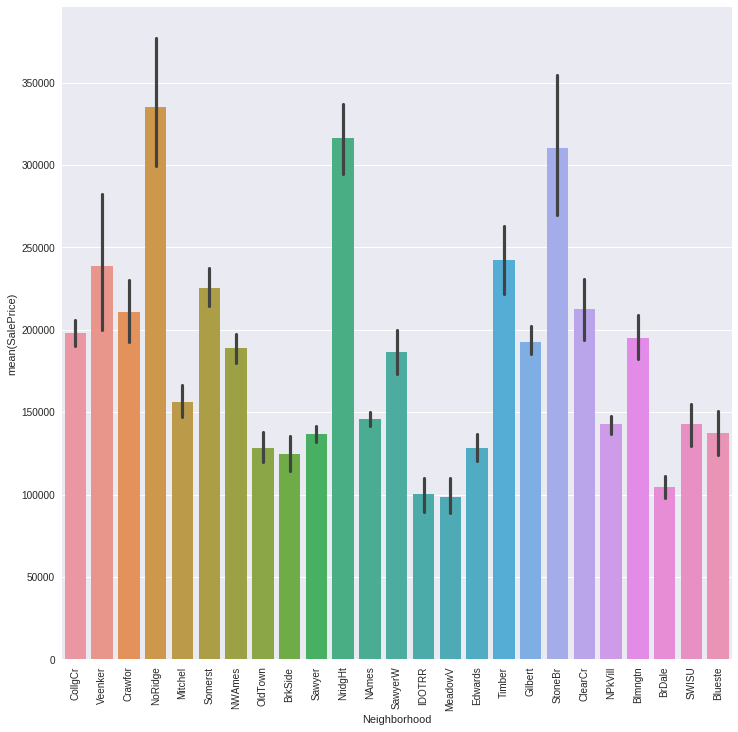

In [303]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
plt.xticks(rotation=90)
sns.barplot(data=housePrices, y='SalePrice', x='Neighborhood', ax=ax)

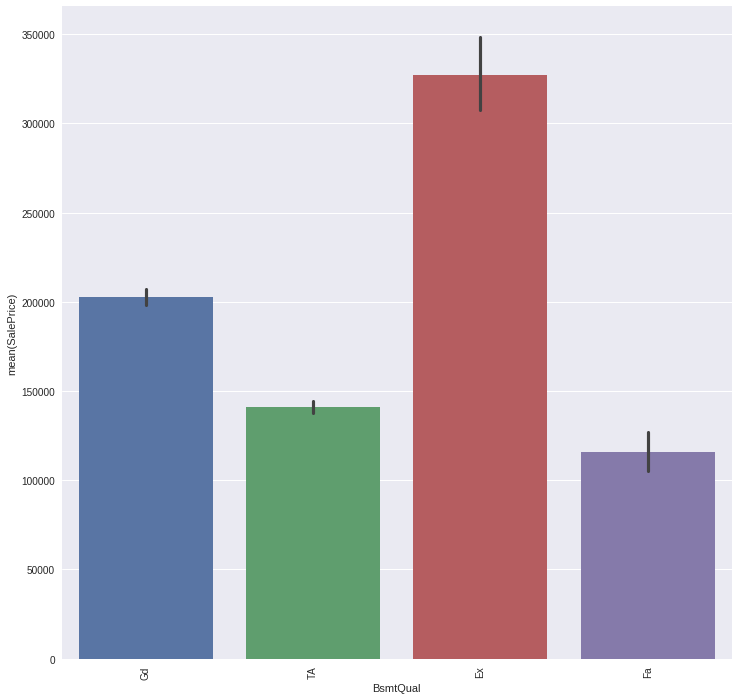

In [375]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
plt.xticks(rotation=90)
sns.barplot(data=housePrices, y='SalePrice', x='BsmtQual', ax=ax)

In [296]:
fig = fig.get_figure()

In [297]:
fig.set_

<bound method Artist.set_figure of <matplotlib.figure.Figure object at 0x7f69559cadd8>>

In [409]:
from brew.base import Ensemble, EnsembleClassifier
from brew.stacking.stacker import EnsembleStack, EnsembleStackClassifier
from brew.combination.combiner import Combiner

/opt/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [410]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [524]:
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

https://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor/
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

In [525]:
lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
lasso = Lasso()
svr_rbf = SVR(kernel='rbf')

In [573]:
stregr = StackingRegressor(regressors=[svr_lin, lr, ridge, r2, r5, lasso, GBoost, model_lgb, model_xgb], 
                           meta_regressor=svr_rbf)

In [574]:
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb

In [575]:
# Initializing Classifiers
r1 = LinearRegression()
r2 = RandomForestRegressor(random_state=0, n_estimators=300)
r3 = SVR()
r4 = KNeighborsRegressor()
r5 = GradientBoostingRegressor(n_estimators=300, max_depth=3, learning_rate=0.1)
r6 = MLPRegressor()
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                              nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [576]:
categorical_pipe = Pipeline([
    ('select_cats', ppc.DFTransform(lambda X: X.select_dtypes(include=[object]))),
    ('Scale', ppc.HighCardinality(f=0.5) ),
    ('MinMAx', ppc.DFScaler(MinMaxScaler()))
#     ('fill_nan', ppc.DFTransform(lambda X: X.fillna('NA')) ),
#    ('oneHot', ppc.DFDummyTransformer())
])

In [577]:
regressor_pipe = Pipeline([
    ('parallel_pipe', ppc.DFFeatureUnion([('nums', numerical_pipe), ('cats', categorical_pipe)])),
#        ('parallel_pipe', ppc.DFFeatureUnion([('cats', categorical_pipe)])),
#      ('parallel_pipe', ppc.DFFeatureUnion([('nums', numerical_pipe)])),
    ('regressor', stregr)
])

In [578]:
# Training the stacking classifier

regressor_pipe.fit(X_train, y_train)
regressor_pipe.predict(X_train)

# Evaluate and visualize the fit

print("Mean Squared Error: %.4f"
      % np.mean((regressor_pipe.predict(X_test) - y_test) ** 2))
print('Variance Score: %.4f' % regressor_pipe.score(X_test, y_test))

#with plt.style.context(('seaborn-whitegrid')):
#    plt.scatter(X_test, y_test, c='lightgray')
#    plt.plot(X_test, regressor_pipe.predict(X_test), c='darkgreen', lw=2)

#plt.show()
regressor_pipe.score(X_test, y_test)

/home/jodahr/Programs/pandas_pipeline_classes/pandas_pipeline_classes/__init__.py:378: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-(n-k)/f))


Mean Squared Error: 0.0156
Variance Score: 0.9076


0.90757287645263474

In [484]:
regressor_pipe.get_params()

{'memory': None,
 'parallel_pipe': DFFeatureUnion(transformer_list=[('nums', Pipeline(memory=None,
      steps=[('select_nums', DFTransform(copy=True, func=<function <lambda> at 0x7f6958a2bd08>)), ('fill_nan', DFImputer(copy=True,
      imputer=Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0))), ('MinMax', DFScaler(copy=..., f=0.5)), ('MinMAx', DFScaler(copy=True, scaler=MinMaxScaler(copy=True, feature_range=(0, 1))))]))]),
 'parallel_pipe__transformer_list': [('nums', Pipeline(memory=None,
        steps=[('select_nums', DFTransform(copy=True, func=<function <lambda> at 0x7f6958a2bd08>)), ('fill_nan', DFImputer(copy=True,
        imputer=Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0))), ('MinMax', DFScaler(copy=True, scaler=MinMaxScaler(copy=True, feature_range=(0, 1))))])),
  ('cats', Pipeline(memory=None,
        steps=[('select_cats', DFTransform(copy=True, func=<function <lambda> at 0x7f6954d4b1e0>)), ('Scale', HighCardi